## Student Socail media data cleaning and preprocessing

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
# load the data
dataset=pd.read_csv("Students Social Media Addiction.csv")
dataset.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

### Data cleaning and preprocessing

In [4]:
#drop the column student_id because it is not relevant for the analysis
dataset=dataset.drop(columns=['Student_ID'],axis=1)
dataset.head()


,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [5]:
dataset.isnull().sum()

Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [6]:
#check duplicate rows
duplicate_rows=dataset[dataset.duplicated()]
print("Number of duplicate rows:",duplicate_rows.shape)

Number of duplicate rows: (1, 12)


In [7]:
#remove duplicate rows
dataset=dataset.drop_duplicates()

In [8]:
dataset.duplicated().sum()

np.int64(0)

In [9]:
cat_cols=dataset.select_dtypes(include=['object']).columns
num_cols=dataset.select_dtypes(include=['int64','float64']).columns

In [10]:
cat_cols

Index(['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Relationship_Status'],
      dtype='object')

In [11]:
num_cols

Index(['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [12]:
dataset['Gender'].value_counts()

Gender
Female    353
Male      351
Name: count, dtype: int64

In [13]:
dataset['Academic_Level'].value_counts()

Academic_Level
Undergraduate    353
Graduate         324
High School       27
Name: count, dtype: int64

In [14]:
dataset['Country'].value_counts()

Country
India        53
USA          40
Canada       34
Denmark      27
Ireland      27
             ..
Uruguay       1
Ecuador       1
Venezuela     1
Peru          1
Jamaica       1
Name: count, Length: 110, dtype: int64

In [15]:
# value count for all categorial columns
for col in cat_cols:
    print(f"Value counts for column: {col}")
    print(dataset[col].value_counts())
    print("\n")

Value counts for column: Gender
Gender
Female    353
Male      351
Name: count, dtype: int64


Value counts for column: Academic_Level
Academic_Level
Undergraduate    353
Graduate         324
High School       27
Name: count, dtype: int64


Value counts for column: Country
Country
India        53
USA          40
Canada       34
Denmark      27
Ireland      27
             ..
Uruguay       1
Ecuador       1
Venezuela     1
Peru          1
Jamaica       1
Name: count, Length: 110, dtype: int64


Value counts for column: Most_Used_Platform
Most_Used_Platform
Instagram    248
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
LINE          12
KakaoTalk     12
VKontakte     12
YouTube       10
Name: count, dtype: int64


Value counts for column: Affects_Academic_Performance
Affects_Academic_Performance
Yes    452
No     252
Name: count, dtype: int64


Value counts for column: Relationship_Status
Relationship_Status
Single  

In [16]:
dataset.head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


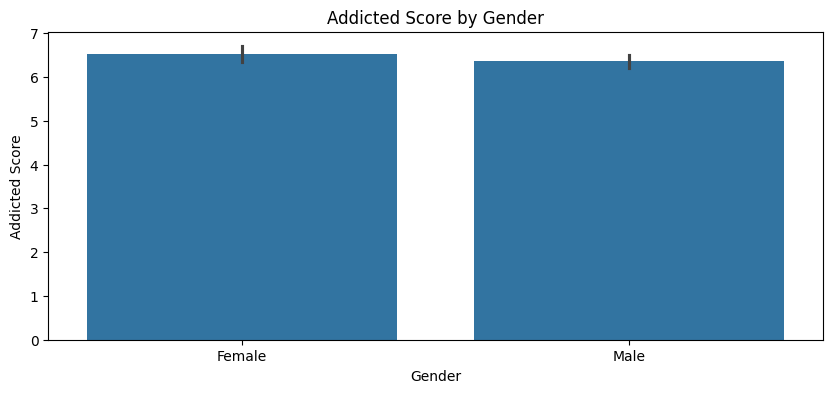

In [17]:
# addicted score against gender
plt.figure(figsize=(10,4))
sns.barplot(data=dataset, x='Gender', y='Addicted_Score')
plt.title('Addicted Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Addicted Score')
plt.show()

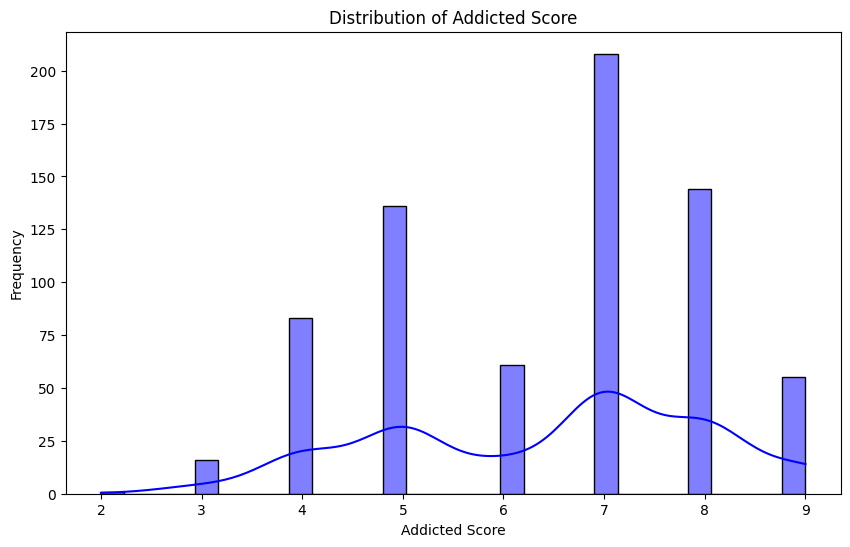

In [18]:
# addicted score distribution 
plt.figure(figsize=(10,6))
sns.histplot(dataset['Addicted_Score'], bins=30, kde=True, color='blue')
plt.title('Distribution of Addicted Score')
plt.xlabel('Addicted Score')
plt.ylabel('Frequency')
plt.show()

In [19]:

# label encoding for the categorial columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_cols:
    dataset[col]=le.fit_transform(dataset[col])
dataset.head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,0,2,10,5.2,1,1,6.5,6,1,3,8
1,22,1,0,39,2.1,7,0,7.5,8,2,0,3
2,20,0,2,102,6.0,6,1,5.0,5,0,4,9
3,18,1,1,101,3.0,11,0,7.0,7,2,1,4
4,21,1,0,18,4.5,0,1,6.0,6,1,2,7


In [20]:
dataset.describe()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,20.659091,0.498580,1.041193,58.232955,4.918040,3.511364,0.642045,6.869176,6.228693,1.498580,2.849432,6.436080
std,1.400153,0.500353,0.980467,30.637601,1.258157,3.371690,0.479740,1.127631,1.104871,0.584288,0.958632,1.588151
min,18.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,3.800000,4.000000,0.000000,0.000000,2.000000
25%,19.000000,0.000000,0.000000,31.000000,4.100000,1.000000,0.000000,6.000000,5.000000,1.000000,2.000000,5.000000
50%,21.000000,0.000000,2.000000,59.000000,4.800000,1.000000,1.000000,6.900000,6.000000,2.000000,3.000000,7.000000
75%,22.000000,1.000000,2.000000,90.000000,5.800000,6.000000,1.000000,7.700000,7.000000,2.000000,4.000000,8.000000
max,24.000000,1.000000,2.000000,109.000000,8.500000,11.000000,1.000000,9.600000,9.000000,2.000000,5.000000,9.000000


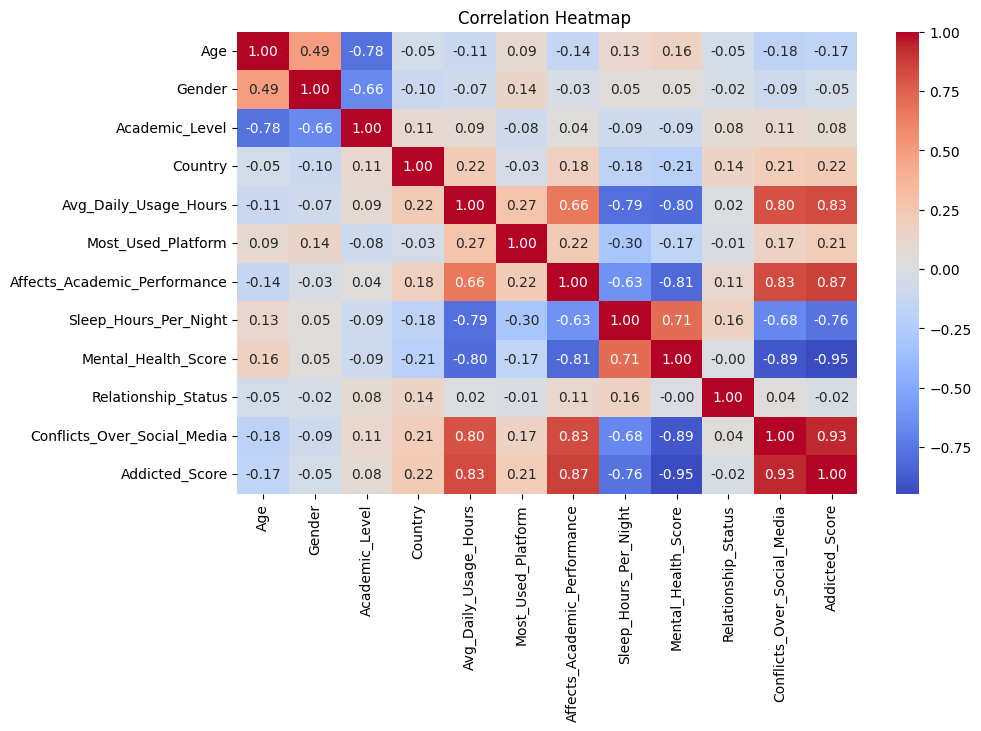

In [21]:
# corelation matrix heatmap
plt.figure(figsize=(10,6))
corr_matrix=dataset.corr()
sns.heatmap(data=corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap ")
plt.show()

In [22]:
dataset.to_csv('cleaned_student_social_media_addiction.csv',index=False)

In [ ]:
# Print column names and data types for Flask app configuration
print("Column Names:")
print(dataset.columns.tolist())
print("\nData Types:")
print(dataset.dtypes)
print("\nDataset Shape:", dataset.shape)
print("\nFirst few rows:")
print(dataset.head())